
#**Machine Learning And Data Science Laboratory(410501)**

#BE Sem I Honors in ML&DS

#Academic Year: 2022-23

#Lab Assignment No.2 



**NAME : CHITTARANJAN RATHOD**

**ROLL NO : 42457**

**PRN NO : 72017193J**

**ABC ID : 129-879-043-197**

**BRANCH : E&TC**

**COLLEGE : PICT**

In [ ]:
from google.colab import drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.utils import np_utils

In [ ]:
df = pd.read_csv("/content/A_Z Handwritten Data.csv")
df.head()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.rename(columns={'0':'target'}, inplace=True)
df.head()

,target,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df['target'].value_counts()

0    3352
Name: target, dtype: int64

In [ ]:
X = df.drop('target',axis = 1)
y = df['target']

print(X.shape)
print(y.shape)

(3352, 784)
(3352,)


##Split into Training and Testing

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

standard_scaler = MinMaxScaler()
standard_scaler.fit(x_train)

# scaling data
x_train = standard_scaler.transform(x_train)
x_test = standard_scaler.transform(x_test)

# One hot encoding targets
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2681, 784)
(671, 784)
(2681, 1)
(671, 1)


In [ ]:
#no. of features per data sample
x_train.shape[1]

784

In [ ]:
#total targets
len(y.unique())

1

## Create ANN Model

In [ ]:
# creating ANN model

model = keras.Sequential()
model.add(layers.Dense(500, activation="relu" , input_dim = x_train.shape[1]))
model.add(layers.Dense(400, activation="relu"))
model.add(layers.Dense(300, activation="relu"))
model.add(layers.Dense(200, activation="relu"))
model.add(layers.Dense(100, activation="relu"))
model.add(layers.Dense(len(y.unique()), activation="softmax"))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam" , metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 400)               200400    
                                                                 
 dense_2 (Dense)             (None, 300)               120300    
                                                                 
 dense_3 (Dense)             (None, 200)               60200     
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 1)                 101       
                                                                 
Total params: 793,601
Trainable params: 793,601
Non-trai

In [ ]:
model.fit(x_train, y_train, epochs=10, validation_data = (x_test, y_test))

Epoch 1/10
84/84 [==============================] - 2s 16ms/step - loss: nan - acc: 0.6203 - val_loss: nan - val_acc: 0.0000e+00
Epoch 2/10
84/84 [==============================] - 1s 12ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 3/10
84/84 [==============================] - 1s 12ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 4/10
84/84 [==============================] - 1s 12ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 5/10
84/84 [==============================] - 1s 12ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 6/10
84/84 [==============================] - 1s 13ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 7/10
84/84 [==============================] - 1s 13ms/step - loss: nan - acc: 0.0000e+00 - val_loss: nan - val_acc: 0.0000e+00
Epoch 8/10
84/84 [==============================] - 1s 13ms/step - loss: 

## Make predictions

In [ ]:
model.evaluate(x_test,y_test)

21/21 [==============================] - 0s 5ms/step - loss: nan - acc: 0.0000e+00


[nan, 0.0]

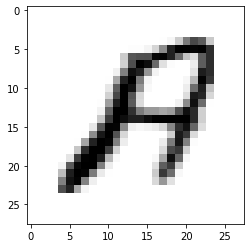

In [ ]:
# original target
plt.imshow(x_test[150].reshape(28,28), cmap='Greys')
plt.show()

In [ ]:
# predicted target
test_pred = model.predict(x_test[150].reshape(1,784))
chr(np.argmax(test_pred)+65)

1/1 [==============================] - 0s 111ms/step


'A'